In [1]:
import matplotlib.pyplot as mp
import numpy as np
import optical
import lightcurves
import sys
#from ipywidgets import widgets
%matplotlib inline 


In [2]:
target = 'NGC3201'
folder = '/Users/jrneeley/CRRP/'+target+'/'
optical_folder = '/Users/jrneeley/CRRP/OpticalCatalogs/'
#folder = '/Users/Jill/CRRP/'+target+'/'
#optical_folder = '/Users/Jill/CRRP/OpticalCatalogs/'

# Read in variables from Clement catalog

In [3]:
dtype1 = np.dtype([('id', int), ('period', float)])
data = np.loadtxt(folder+target+'-clement.txt', dtype=dtype1, usecols=(0,3))

In [4]:
datasets = optical.compile_datasets(optical_folder, target, old=0)
print 'Datasets:'
print datasets

Datasets:
['Y0701' 'lcogt2' 'zingle' 'west1' 'wfi13' 'lcogt3' 'ct1204' 'lee2' 'bond6'
 'wfi6' 'efosc08a' 'wfi22' 'wfi11' 'wfi41' 'west2' 'efosc1101b' 'dec97'
 'emmi0601' 'pab' 'soar0805' 'B1002' 'fors20605' 'apr97' 'emmi2'
 'fors20602' 'emmi7' 'fors9912' 'zntt' 'efosc1101' 'ct84' 'ct85' 'susi9405'
 'efosc1406' 'emmi6' 'efosc1305']


In [5]:
ind=0
lcv_file = optical_folder+target+'lcvs/'+target+'V'+str(data['id'][ind])+'.lcv'
lcv = str(data['id'][ind])
print data['period'][ind]

0.6048


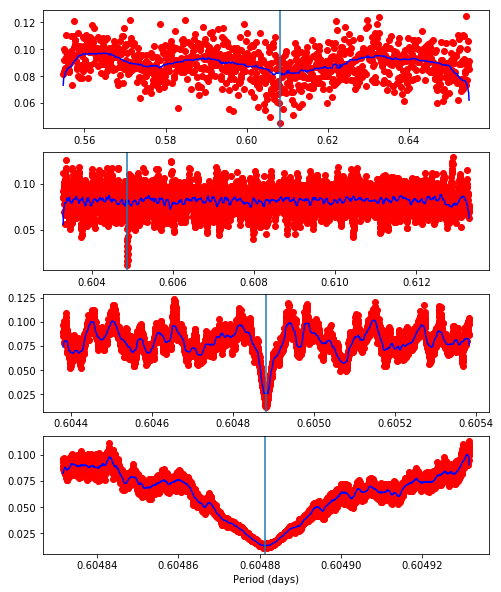

Star  Period  Period_new
V1 0.6048 0.6048814


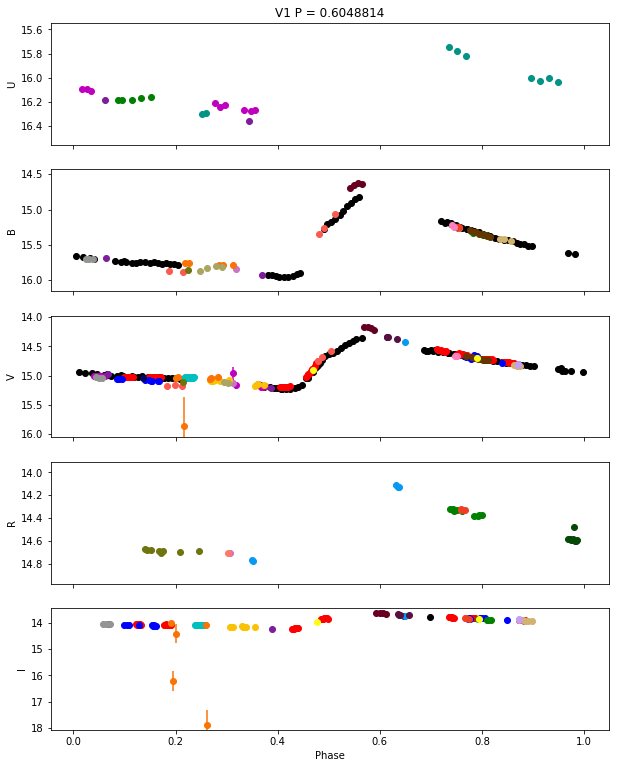

In [6]:
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
period = lightcurves.period_search(V, data['period'][ind], 'V'+str(lcv))
print 'Star  Period  Period_new'
print 'V'+lcv, data['period'][ind], period
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, 'V'+str(lcv), datasets)